In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip -q smsspamcollection.zip

df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

print(f"Nous avons: {len(df)} messages")
print(f"\nDistribution des classes:")
print(df['label'].value_counts())


Nous avons: 5572 messages

Distribution des classes:
label
ham     4825
spam     747
Name: count, dtype: int64


In [5]:
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


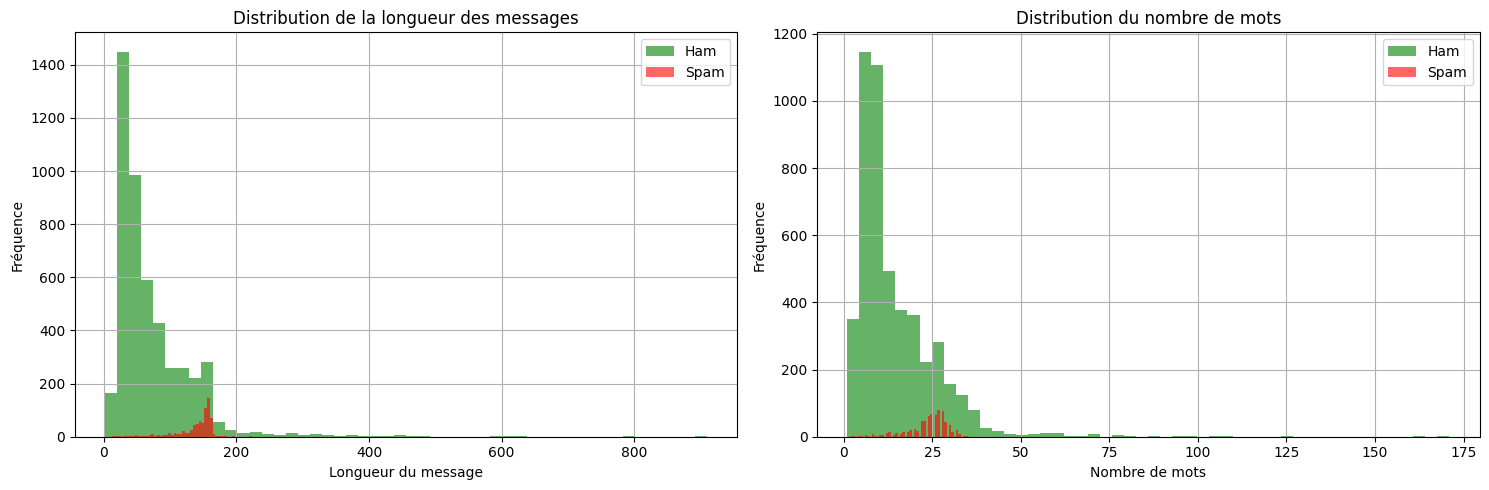

In [ ]:
df['length'] = df['message'].str.len()
df['word_count'] = df['message'].str.split().str.len()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))


df[df['label']=='ham']['length'].hist(bins=50, alpha=0.6, label='Ham', ax=axes[0], color='green')
df[df['label']=='spam']['length'].hist(bins=50, alpha=0.6, label='Spam', ax=axes[0], color='red')
axes[0].set_xlabel('Longueur du message')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la longueur des messages')
axes[0].legend()



df[df['label']=='ham']['word_count'].hist(bins=50, alpha=0.6, label='Ham', ax=axes[1], color='green')
df[df['label']=='spam']['word_count'].hist(bins=50, alpha=0.6, label='Spam', ax=axes[1], color='red')
axes[1].set_xlabel('Nombre de mots')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution du nombre de mots')
axes[1].legend()

plt.tight_layout()
plt.savefig('outputs/sms_eda.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
df['label_encoded'] = (df['label'] == 'spam').astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    df['message'],
    df['label_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=df['label_encoded']
)


In [ ]:

import pickle
with open('data/train_test_split.pkl', 'wb') as f:
    pickle.dump({
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }, f)
    print("Data saved to data/train_test_split.pkl")

Data saved to data/train_test_split.pkl
